### [이코테 375p] 금광

**문제**    
       
n × m 크기의 금광이 있다. 금광은 1 × 1 크기의 칸으로 나누어져 있으며, 각 칸은 특정한 크기의 금이 들어 있다

채굴자는 첫 번째 열부터 출발하여 금을 캐기 시작한다. 맨 처음에는 첫 번째 열의 어느 행에서든 출발할 수 있다.
이후에 m - 1번에 걸쳐서 매번 오른쪽 위, 오른쪽, 오른쪽 아래 3가지 중 하나의 위치로 이동해야 한다.
결과적으로 채굴자가 얻을 수 있는 금의 최대 크기를 출력하는 프로그램을 작성하라      

In [21]:
n,m = map(int, input().split())
data = list(map(int, input().split()))

3 4
1 3 3 2 2 1 4 1 0 6 4 7


In [28]:
gold_map = []
cnt = 0
for _ in range(n):
    gold_map.append(data[cnt:cnt+m])
    cnt += m
    
gold_map

[[1, 3, 3, 2], [2, 1, 4, 1], [0, 6, 4, 7]]

In [29]:
for i in range(1, m):
    for j in range(n):
        if j == 0:
            up = 0
        else: 
            up = gold_map[j-1][i-1]
        if j == n-1:
            down = 0
        else:
            down = gold_map[j+1][i-1]
        side = gold_map[j][i-1]
        gold_map[j][i] = max(gold_map[j][i]+up, gold_map[j][i]+down, gold_map[j][i]+side)

In [32]:
max(gold_map[-1])

19

### [[백준 1932]](https://www.acmicpc.net/problem/1932) 정수 삼각형

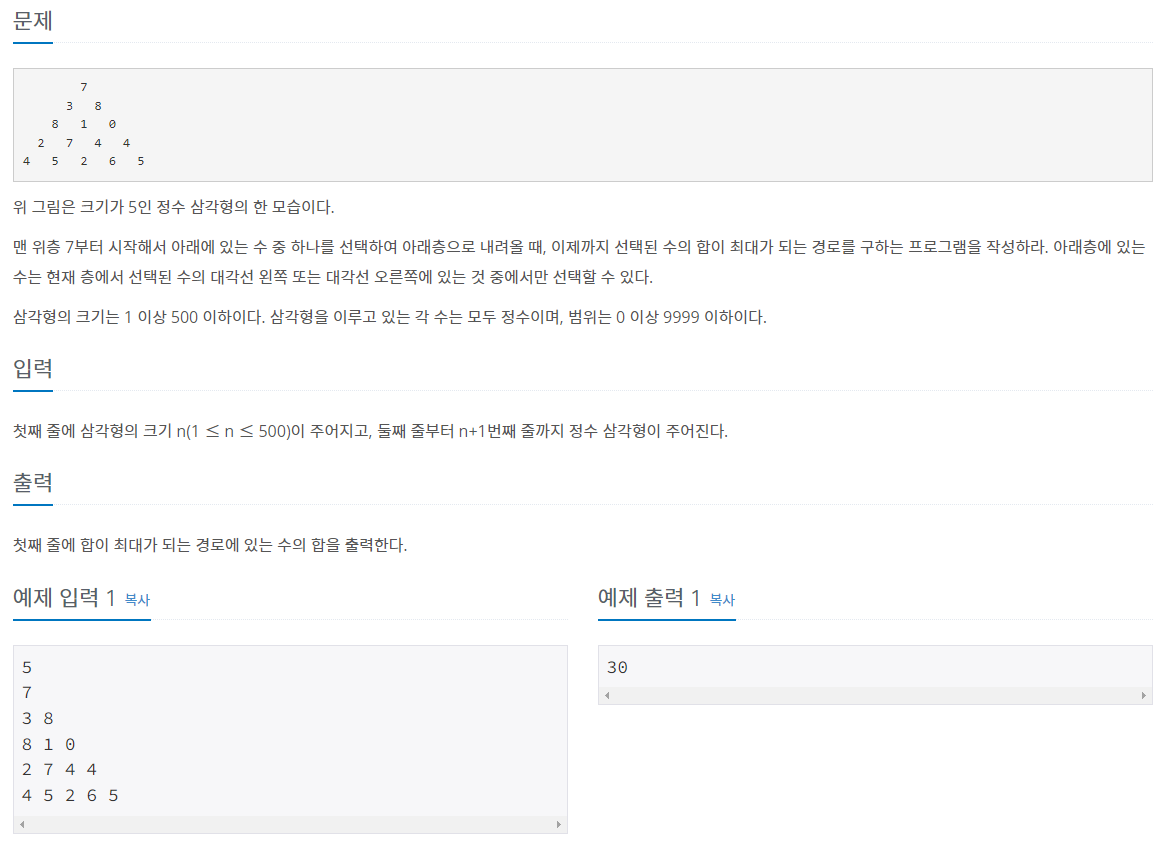


In [79]:
n = int(input())

5


In [59]:
dp = []
for _ in range(n):
    dp.append(list(map(int, input().split())))
dp

7
3 8
8 1 0
2 7 4 4
4 5 2 6 5


[[7], [3, 8], [8, 1, 0], [2, 7, 4, 4], [4, 5, 2, 6, 5]]

In [80]:
dp = [[7], [3, 8], [8, 1, 0], [2, 7, 4, 4], [4, 5, 2, 6, 5]]
for i in range(1,n):
    for j in range(i+1):
        if j == 0:
            dp[i][j] += dp[i-1][j]
        elif j == i:
            dp[i][j] += dp[i-1][j-1]
        else:
            dp[i][j] = dp[i][j] + max(dp[i-1][j], dp[i-1][j-1])
            
max(dp[-1])

30

### [[백준 14501]](https://www.acmicpc.net/problem/14501) 퇴사
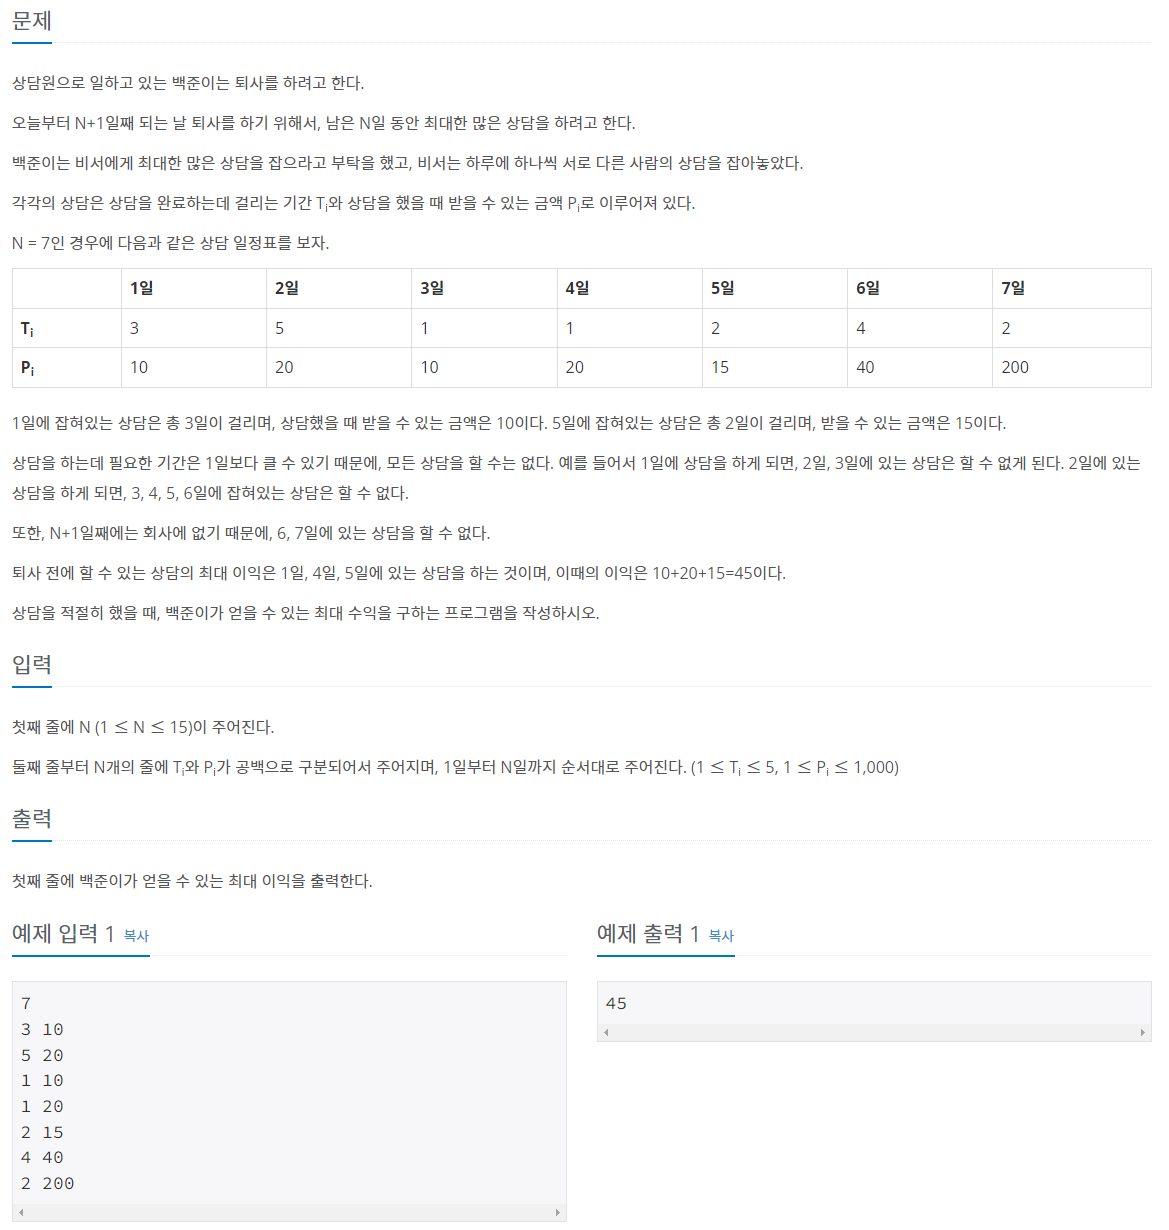

In [68]:
n = int(input())
table = []
for _ in range(n):
    table.append(list(map(int, input().split())))


7
3 10
5 20
1 10
1 20
2 15
4 40
2 200


In [76]:
dp = [0]*(n+1)
for day in range(n-1, -1,-1):
    t, p = table[day]
    if day + t > n:
        dp[day] = dp[day+1]
    else:
        dp[day] = max(dp[day+1], p+dp[day+t])

In [77]:
print (dp[0])

[45, 45, 45, 35, 15, 0, 0, 0]

### [[백준 18353]](https://www.acmicpc.net/problem/18353) 병사 배치하기
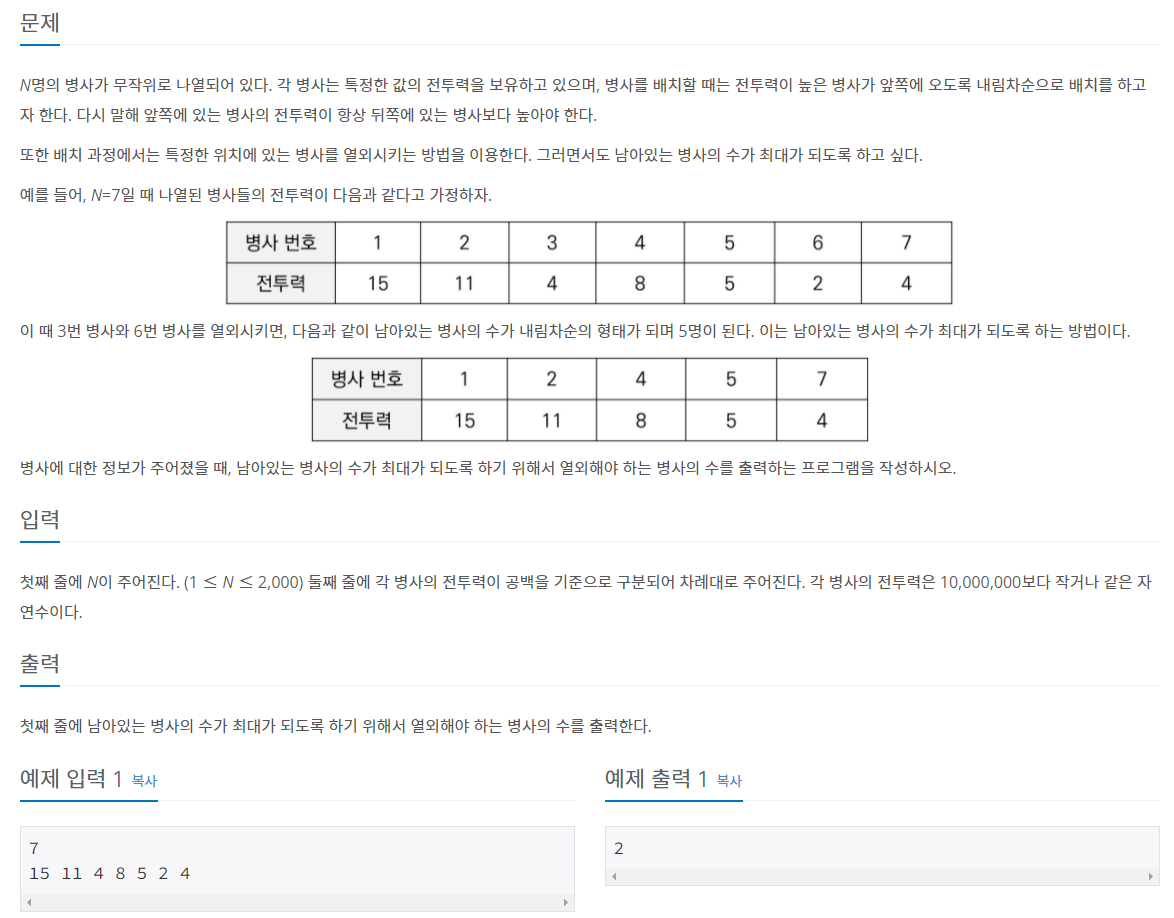

In [108]:
n = int(input())
army = list(map(int, input().split()))

7
15 11 4 8 5 2 4


In [114]:
## 최장 증가 부분 수열 (LIS) 활용
army.reverse()

dp = [1]*n

for now in range(1,n):
    for front in range(0,now):
        if army[front] < army[now]:
            dp[now] = max(dp[now], dp[front]+1)

print (n - max(dp))

2


In [111]:
## 틀린 풀이
dp = []
for i in range(n-1):
    if army[i] > army[i+1]:
        dp.append(max(army[i], army[i+1]))
    if i == (n-2):
        if dp[-1] > army[-1]:
            dp.append(army[-1])
            
print (n- len(dp))

2
